### Library

In [0]:
%tensorflow_version 2.x

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!ls  "/content/drive/My Drive/Mask_Datasets/"

Train  Validation


### Tensorflow JS

In [14]:
pip install tensorflowjs

In [15]:
!tensorflowjs_converter --version


tensorflowjs 1.7.4r1

Dependency versions:
  keras 2.3.0-tf
  tensorflow 2.2.0


### Processing

In [0]:
#define directory

base_dir = "/content/drive/My Drive/Mask_Datasets/"

train_dir = os.path.join(base_dir, "Train")
train_mask_dir = os.path.join(train_dir, "Mask")
train_no_mask_dir = os.path.join(train_dir, "No_mask")

val_dir = os.path.join(base_dir, "Validation")
val_mask_dir = os.path.join(val_dir, "Mask")
val_no_mask_dir = os.path.join(val_dir, "No_mask")


In [28]:
#Understanding the data

num_mask_train = len(os.listdir(train_mask_dir))
num_no_mask_train = len(os.listdir(train_no_mask_dir))
total_train = num_mask_train + num_no_mask_train

num_mask_val = len(os.listdir(val_mask_dir))
num_no_mask_val = len(os.listdir(val_no_mask_dir))
total_val = num_mask_val + num_no_mask_val

print("train data: mask ==> ", num_mask_train)
print("train data: no_mask ==> ", num_no_mask_train)
print("total train data ==> ", total_train)
print("                      ")
print("validation data: mask ==> ", num_mask_val)
print("validation data: no_mask ==> ", num_no_mask_val)
print("total validation data ==> ", total_val)


train data: mask ==>  350
train data: no_mask ==>  401
total train data ==>  751
                      
validation data: mask ==>  150
validation data: no_mask ==>  200
total validation data ==>  350


In [0]:
batch_size = 100
epochs = 10
IMG_WIDTH = 200
IMG_HEIGHT = 100

In [30]:
#Data Preparation

train_image_generator = ImageDataGenerator(
                          rescale=1./255, 
                          horizontal_flip=True,
                          rotation_range=45,
                          shear_range=0.2,
                          zoom_range=0.5,
                          width_shift_range=.15,
                          height_shift_range=.15,
                        )

train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode="binary"
)

val_image_generator = ImageDataGenerator(rescale=1./255)

val_data_gen = val_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = val_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode="binary"
)


Found 751 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


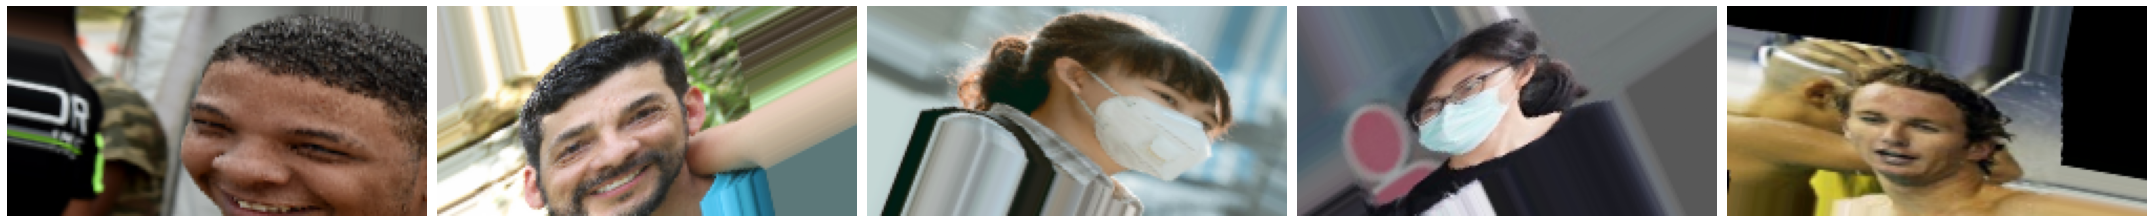

In [31]:
#visualize dataset
sample_training_image, _ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(30,30))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

plotImages(sample_training_image[:5])

In [0]:
#model

convolutional_block = convolutional_blocks = [
  Conv2D(16,(3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, (3,3), activation="relu"),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64,(3,3), activation="relu"),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(512, activation="relu"),
  Dense(1, activation="sigmoid")
]

model = Sequential(convolutional_blocks)

In [0]:
## compile

model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 198, 16)       448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 99, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14720)            

In [35]:
history = model.fit(
    train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= total_val // batch_size
)

Epoch 1/10
7/7 [==============================] - 42s 6s/step - loss: 0.6926 - accuracy: 0.4516 - val_loss: 0.6786 - val_accuracy: 0.4233
Epoch 2/10
7/7 [==============================] - 41s 6s/step - loss: 0.6678 - accuracy: 0.5745 - val_loss: 0.5686 - val_accuracy: 0.8933
Epoch 3/10
7/7 [==============================] - 41s 6s/step - loss: 0.6305 - accuracy: 0.6836 - val_loss: 0.6637 - val_accuracy: 0.4533
Epoch 4/10
7/7 [==============================] - 43s 6s/step - loss: 0.6127 - accuracy: 0.7300 - val_loss: 0.5919 - val_accuracy: 0.6833
Epoch 5/10
7/7 [==============================] - 43s 6s/step - loss: 0.5922 - accuracy: 0.7714 - val_loss: 0.5461 - val_accuracy: 0.8900
Epoch 6/10
7/7 [==============================] - 44s 6s/step - loss: 0.5662 - accuracy: 0.8203 - val_loss: 0.5376 - val_accuracy: 0.8900
Epoch 7/10
7/7 [==============================] - 42s 6s/step - loss: 0.5705 - accuracy: 0.8541 - val_loss: 0.5240 - val_accuracy: 0.8667
Epoch 8/10
7/7 [==================

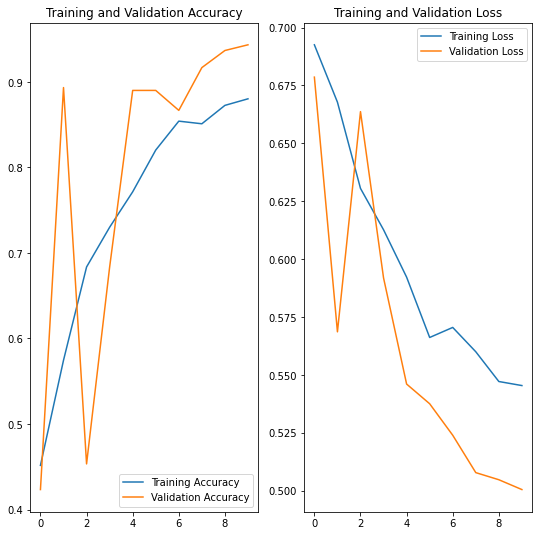

In [36]:
#plot loss & acc

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
evaluate = model.evaluate(val_data_gen, steps=total_val/batch_size)
print(evaluate)

4/3 [==================================] - 9s 2s/step - loss: 0.4983 - accuracy: 0.9486
[0.49831393361091614, 0.9485714435577393]


### Saving the model

In [0]:
tfjs_target_dir = "/content/drive/My Drive/Mask_Datasets/Model/"

In [0]:
import tensorflowjs as tfjs

In [40]:
tfjs.converters.save_keras_model(model, tfjs_target_dir)

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
